# Text Classification Assessment

This assessment is a text classification project where the goal is to classify the genre of a movie based on its characteristics, primarily the text of the plot summarization. You have a training set of data that you will use to identify and create your best predicting model. Then you will use that model to predict the classes of the test set of data. We will compare the performance of your predictions to your classmates using the F1 Score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

The **movie_train.csv** dataset contains information (`Release Year`, `Title`, `Plot`, `Director`, `Cast`) about 10,682 movies and the label of `Genre`. There are 9 different genres in this data set, so this is a multiclass problem. You are expected to primarily use the plot column, but can use the additional columns as you see fit.

After you have identified your best performing model, you will create predictions for the test set of data. The test set of data, contains 3,561 movies with all of their information except the `Genre`. 

Below is a list of tasks that you will definitely want to complete for this challenge, but this list is not exhaustive. It does not include any tasks around handling class imbalance or about how to test multiple different models and their tuning parameters, but you should still look at doing those to see if they help you to create a better predictive model.


# Good Luck

### Task #1: Perform imports and load the dataset into a pandas DataFrame


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('movie_train.csv')
df.head()

,Unnamed: 0,Release Year,Title,Plot,Director,Cast,Genre
0,10281,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror
1,7341,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama
2,10587,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier",drama
3,25495,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama
4,16607,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action


### Task #2: Check for missing values:

In [4]:
# Check for NaN values:
df.isnull().sum()

Unnamed: 0        0
Release Year      0
Title             0
Plot              0
Director          0
Cast            169
Genre             0
dtype: int64

In [5]:
# Check for whitespace strings (it's OK if there aren't any!):
blanks = []  # start with an empty list

for rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        for i in df.itertuples():
            if rv.isspace():         # test 'review' for whitespace
                blanks.append(i)     # add matching index numbers to the list
        
len(blanks)

0

### Task #3: Remove NaN values:

In [6]:
df.dropna(inplace=True)

### Task #4: Take a look at the columns and do some EDA to familiarize yourself with the data. 

In [7]:
df.head()

,Unnamed: 0,Release Year,Title,Plot,Director,Cast,Genre
0,10281,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror
1,7341,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama
2,10587,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier",drama
3,25495,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama
4,16607,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action


In [10]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
import pickle

stemmer = PorterStemmer()
words = stopwords.words("english")
df['cleaned'] = df['Plot'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [12]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['cleaned']).toarray()
final_features.shape

(10513, 107328)

In [13]:
#first we split our dataset into testing and training set:
# this block is to split the dataset into training and testing set 
X = df['cleaned']
Y = df['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)
ytest = np.array(y_test)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

      action       0.59      0.24      0.34       280
   adventure       0.80      0.04      0.07       109
      comedy       0.50      0.46      0.48       908
       crime       0.50      0.04      0.08        96
       drama       0.44      0.77      0.56      1183
      horror       0.69      0.58      0.63       255
     romance       0.57      0.09      0.16       217
    thriller       0.43      0.05      0.09       243
     western       0.90      0.67      0.77       179

    accuracy                           0.49      3470
   macro avg       0.60      0.33      0.35      3470
weighted avg       0.53      0.49      0.45      3470

[[ 68   0  42   1 155   7   5   2   0]
 [  8   4  26   0  68   1   0   0   2]
 [  5   0 418   0 455  17   3   5   5]
 [  4   0  21   4  64   1   0   1   1]
 [ 18   0 222   3 913   9   7   6   5]
 [  2   1  18   0  84 148   0   2   0]
 [  2   0  44   0 151   0  20   0   0]
 [  9   0  34   0 157 

### Task #5: Split the data into train & test sets:

Yes we have a holdout set of the data, but you do not know the genres of that data, so you can't use it to evaluate your models. Therefore you must create your own training and test sets to evaluate your models. 

In [257]:
from sklearn.model_selection import train_test_split

X = df5.drop(columns=['Genre', 'Title','Director','Cast', 'Unnamed: 0'])
y = df5['Genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Task #6: Build a pipeline to vectorize the date, then train and fit your models.
You should train multiple types of models and try different combinations of the tuning parameters for each model to obtain the best one. You can use the SKlearn functions of GridSearchCV and Pipeline to help automate this process.


In [ ]:
from sklearn.model_selection import GridSearchCV


# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=3, verbose=2, n_jobs = 1)



In [26]:
# Fit grid search

best_model = clf.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total= 6.4min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.4min remaining:    0.0s
/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2, total= 6.5min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=1.0, classifier__penalty=l2 
[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=4.641588833612778, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=21.544346900318832, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 6.6min
[CV] classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2 


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), classifier__C=100.0, classifier__penalty=l2, total= 6.6min
[CV] classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), classifier__max_features=3, class

[CV]  classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), classifier__max_features=4, classifier__n_estimators=100, total= 6.6min
[CV] classifier=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_spli

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 157.6min finished
/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
# model generation
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=3, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=True,
                                 token_patter...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [16]:
predictions = pipeline.predict(X_test)

In [18]:
len(predictions)

3470

In [19]:
prediction = pipeline.predict(X_train)

In [20]:
len(prediction)

7043

In [21]:
predtrn = prediction.tolist()

In [43]:
len(predtrn)

7043

In [45]:
len(predtst)

3470

In [38]:
trainp = pd.DataFrame(predtrn)
trainp.head()

,0
0,western
1,romance
2,drama
3,horror
4,comedy


In [35]:
testp = pd.DataFrame(predtst)
testp.head()

,0
0,drama
1,horror
2,drama
3,drama
4,comedy


In [73]:
len(testp), len(test)

(3470, 3470)

In [74]:
len(trainp), len(train)

(7043, 7043)

In [75]:
part1 = pd.concat([test, testp], axis=1, join='outer')
part1.head()

,cleaned,0
0,NaN,drama
1,lonni wilson ken scott son sharecropp zuba wil...,horror
2,NaN,drama
3,NaN,drama
4,NaN,comedy


In [76]:
len(part1)

5841

In [72]:
len(part2)

4641

In [67]:
trainp.head()

,0
0,western
1,romance
2,drama
3,horror
4,comedy


In [79]:
train.head()

,cleaned
3733,tod lohman run poss the ruthless land baron hu...
1450,two high school senior differ social group go ...
6001,aravind jayaprakash radhakrishnan grow estrang...
1530,a woman name karen strasberg suffer grow tumor...
9244,elli dewitt rebecca de mornay former u s marin...


In [95]:
train.index.names = ['ID']


# result = train.groupby(index).agg({'cleaned': 'cleaned'})
#            .rename(columns={index:'COUNT','TIME':'MEAN_TIME'})
#            .reset_index()

In [96]:
train.head()

,level_0,index,cleaned
ID,,,
0,0,3733,tod lohman run poss the ruthless land baron hu...
1,1,1450,two high school senior differ social group go ...
2,2,6001,aravind jayaprakash radhakrishnan grow estrang...
3,3,1530,a woman name karen strasberg suffer grow tumor...
4,4,9244,elli dewitt rebecca de mornay former u s marin...


In [97]:
news = pd.concat([train,trainp.reset_index(drop=True)], axis=1)
news.head()

,level_0,index,cleaned,0
0,0,3733,tod lohman run poss the ruthless land baron hu...,western
1,1,1450,two high school senior differ social group go ...,romance
2,2,6001,aravind jayaprakash radhakrishnan grow estrang...,drama
3,3,1530,a woman name karen strasberg suffer grow tumor...,horror
4,4,9244,elli dewitt rebecca de mornay former u s marin...,comedy


In [104]:
test.index.names = ['ID']
test.reset_index()
test.head()

,cleaned
ID,
5307,when canadian diplomat chef husband move canad...
7551,august burglari occur home kristi spragu grayd...
2524,the film open philadelphia tv report view broa...
5592,haathon ki lakeeron first four version titl so...
58,the stori movi start young man amitabh bachcha...


In [110]:
test.reset_index(level=0, inplace=True)
test.head()

,index,ID,cleaned
0,0,5307,when canadian diplomat chef husband move canad...
1,1,7551,august burglari occur home kristi spragu grayd...
2,2,2524,the film open philadelphia tv report view broa...
3,3,5592,haathon ki lakeeron first four version titl so...
4,4,58,the stori movi start young man amitabh bachcha...


In [111]:
news1 = pd.concat([test,testp.reset_index(drop=True)], axis=1)
news1.head()

,index,ID,cleaned,0
0,0,5307,when canadian diplomat chef husband move canad...,drama
1,1,7551,august burglari occur home kristi spragu grayd...,horror
2,2,2524,the film open philadelphia tv report view broa...,drama
3,3,5592,haathon ki lakeeron first four version titl so...,drama
4,4,58,the stori movi start young man amitabh bachcha...,comedy


In [114]:
news1.drop(columns=['index'],inplace=True)
news.drop(columns=['level_0'],inplace=True)

In [119]:
news.head()

,index,cleaned,0
0,3733,tod lohman run poss the ruthless land baron hu...,western
1,1450,two high school senior differ social group go ...,romance
2,6001,aravind jayaprakash radhakrishnan grow estrang...,drama
3,1530,a woman name karen strasberg suffer grow tumor...,horror
4,9244,elli dewitt rebecca de mornay former u s marin...,comedy


In [121]:
news.rename(columns={'index':'ID'},inplace=True)

In [122]:
news.head()

,ID,cleaned,0
0,3733,tod lohman run poss the ruthless land baron hu...,western
1,1450,two high school senior differ social group go ...,romance
2,6001,aravind jayaprakash radhakrishnan grow estrang...,drama
3,1530,a woman name karen strasberg suffer grow tumor...,horror
4,9244,elli dewitt rebecca de mornay former u s marin...,comedy


In [123]:
total = news.append(news1)
total.head()

,ID,cleaned,0
0,3733,tod lohman run poss the ruthless land baron hu...,western
1,1450,two high school senior differ social group go ...,romance
2,6001,aravind jayaprakash radhakrishnan grow estrang...,drama
3,1530,a woman name karen strasberg suffer grow tumor...,horror
4,9244,elli dewitt rebecca de mornay former u s marin...,comedy


In [30]:
train = X_train.to_frame()

In [31]:
train.head()

,cleaned
3733,tod lohman run poss the ruthless land baron hu...
1450,two high school senior differ social group go ...
6001,aravind jayaprakash radhakrishnan grow estrang...
1530,a woman name karen strasberg suffer grow tumor...
9244,elli dewitt rebecca de mornay former u s marin...


In [125]:
total.drop(columns=['cleaned'],inplace=True)
total.head()

,ID,0
0,3733,western
1,1450,romance
2,6001,drama
3,1530,horror
4,9244,comedy


In [151]:
total.set_index('ID', inplace=True)

In [152]:
total.head()

,0
ID,
3733,western
1450,romance
6001,drama
1530,horror
9244,comedy


In [32]:
test = X_test.to_frame()
test.head()

,cleaned
5307,when canadian diplomat chef husband move canad...
7551,august burglari occur home kristi spragu grayd...
2524,the film open philadelphia tv report view broa...
5592,haathon ki lakeeron first four version titl so...
58,the stori movi start young man amitabh bachcha...


In [156]:
test.head()

,index,ID,cleaned
0,0,5307,when canadian diplomat chef husband move canad...
1,1,7551,august burglari occur home kristi spragu grayd...
2,2,2524,the film open philadelphia tv report view broa...
3,3,5592,haathon ki lakeeron first four version titl so...
4,4,58,the stori movi start young man amitabh bachcha...


In [153]:
total.to_csv(r'/Users/stephaniekendall/Desktop/Errthang/Flatiron/nyc-ds-100719-lectures/week-11/NLP/classification-assessment/finalanswers_sb.csv', header=False)

### Task #7: Run predictions and analyze the results on the test set to identify the best model.  

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X1_train, X1_test, y1_train, y1_test = train_test_split(df['Plot'], df['Genre'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X1_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y1_train)

In [159]:
predictions = pipeline.predict(X1_test)
matrix = metrics.confusion_matrix(y1_test,predictions)
# Print a classification report
print(metrics.classification_report(y1_test,predictions))

              precision    recall  f1-score   support

      action       0.78      0.13      0.22       193
   adventure       1.00      0.06      0.12        79
      comedy       0.54      0.49      0.52       682
       crime       0.78      0.08      0.14        88
       drama       0.44      0.86      0.58       925
      horror       0.86      0.13      0.22       198
     romance       0.64      0.08      0.14       172
    thriller       0.37      0.04      0.08       167
     western       0.91      0.55      0.69       125

    accuracy                           0.49      2629
   macro avg       0.70      0.27      0.30      2629
weighted avg       0.58      0.49      0.43      2629



In [162]:

labels = df.Genre


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

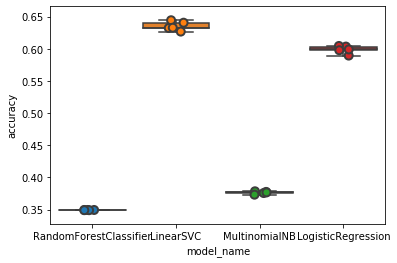

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, final_features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [164]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.635308
LogisticRegression        0.598782
MultinomialNB             0.376391
RandomForestClassifier    0.349377
Name: accuracy, dtype: float64

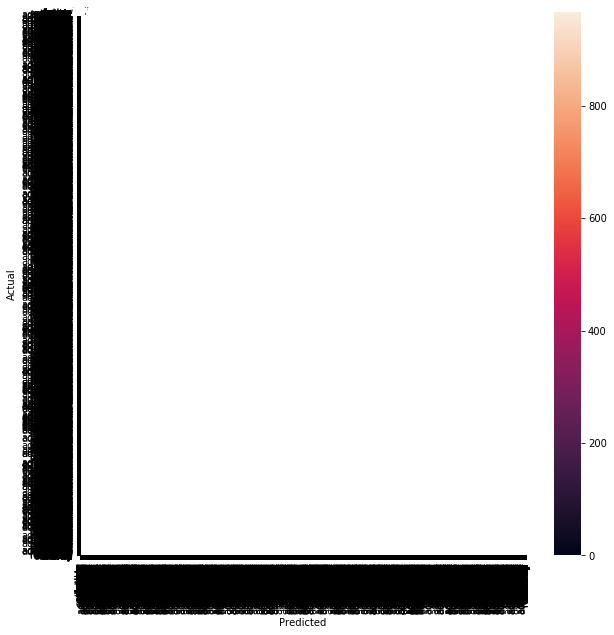

In [171]:
model = LinearSVC()
X1_train, X1_test, y1_train, y1_test, indices_train, indices_test = train_test_split(final_features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y1_test, y1_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df.Genre.values, yticklabels=df.Genre.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

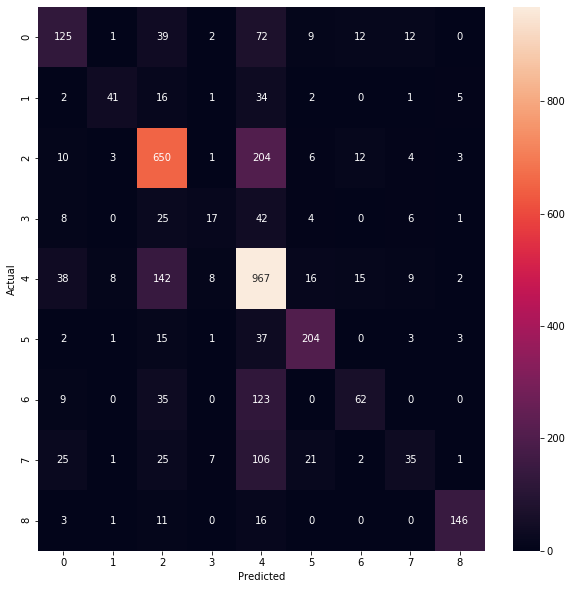

In [172]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [173]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [174]:
with open('LinearSVC.pickle', 'wb') as f:
    pickle.dump(model, f)

In [166]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.349501
1,RandomForestClassifier,1,0.349501
2,RandomForestClassifier,2,0.349501
3,RandomForestClassifier,3,0.349191
4,RandomForestClassifier,4,0.349191
5,LinearSVC,0,0.626724
6,LinearSVC,1,0.640514
7,LinearSVC,2,0.644318
8,LinearSVC,3,0.632255
9,LinearSVC,4,0.632731


In [178]:
# Report the confusion matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y1_test,y1_pred)

In [180]:
# Print a classification report
print(metrics.classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

      action       0.56      0.46      0.51       272
   adventure       0.73      0.40      0.52       102
      comedy       0.68      0.73      0.70       893
       crime       0.46      0.17      0.24       103
       drama       0.60      0.80      0.69      1205
      horror       0.78      0.77      0.77       266
     romance       0.60      0.27      0.37       229
    thriller       0.50      0.16      0.24       223
     western       0.91      0.82      0.86       177

    accuracy                           0.65      3470
   macro avg       0.65      0.51      0.55      3470
weighted avg       0.64      0.65      0.63      3470



In [181]:
# Print the overall accuracy and F1 score
print(metrics.accuracy_score(y1_test,y1_pred))

0.6475504322766571


In [182]:
y2_pred = model.predict(X1_train)

In [183]:
print(metrics.confusion_matrix(y1_train,y2_pred))

[[ 550    1    0    0    0    0    0    0    0]
 [   0  227    0    0    0    0    0    0    0]
 [   0    0 1810    0    0    0    0    0    0]
 [   0    0    0  223    0    0    0    0    0]
 [   0    0    1    1 2465    0    0    1    0]
 [   0    0    0    0    0  544    0    0    0]
 [   1    0    0    0    1    0  413    0    0]
 [   0    0    0    0    1    0    0  456    0]
 [   0    0    0    0    0    0    0    0  348]]


In [184]:
print(metrics.classification_report(y1_train,y2_pred))

              precision    recall  f1-score   support

      action       1.00      1.00      1.00       551
   adventure       1.00      1.00      1.00       227
      comedy       1.00      1.00      1.00      1810
       crime       1.00      1.00      1.00       223
       drama       1.00      1.00      1.00      2468
      horror       1.00      1.00      1.00       544
     romance       1.00      1.00      1.00       415
    thriller       1.00      1.00      1.00       457
     western       1.00      1.00      1.00       348

    accuracy                           1.00      7043
   macro avg       1.00      1.00      1.00      7043
weighted avg       1.00      1.00      1.00      7043



In [185]:
# Print the overall accuracy and F1 score
print(metrics.accuracy_score(y1_train,y2_pred))

0.9990061053528326


### Task #8: Refit the model to all of your data and then use that model to predict the holdout set. 

In [186]:
model.fit(final_features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [187]:
f_pred = model.predict(final_features)

In [201]:
print(metrics.classification_report(labels,f_pred))

              precision    recall  f1-score   support

      action       1.00      1.00      1.00       823
   adventure       1.00      0.99      1.00       329
      comedy       1.00      1.00      1.00      2703
       crime       1.00      1.00      1.00       326
       drama       1.00      1.00      1.00      3673
      horror       1.00      1.00      1.00       810
     romance       1.00      0.99      1.00       644
    thriller       1.00      1.00      1.00       680
     western       1.00      1.00      1.00       525

    accuracy                           1.00     10513
   macro avg       1.00      1.00      1.00     10513
weighted avg       1.00      1.00      1.00     10513



In [199]:
print(metrics.confusion_matrix(f_pred,labels))

[[ 822    0    0    0    0    0    1    1    0]
 [   1  327    0    0    0    0    0    0    0]
 [   0    0 2700    0    1    0    0    0    0]
 [   0    0    0  326    1    0    0    0    0]
 [   0    2    2    0 3669    1    4    2    0]
 [   0    0    0    0    1  809    0    0    0]
 [   0    0    1    0    0    0  639    0    0]
 [   0    0    0    0    1    0    0  677    0]
 [   0    0    0    0    0    0    0    0  525]]


In [200]:
print(metrics.accuracy_score(labels,f_pred))

0.9981927137829354


In [205]:
preds = f_pred.tolist()

In [206]:
df['preds'] = preds

In [207]:
df.head()

,Unnamed: 0,Release Year,Title,Plot,Director,Cast,Genre,cleaned,preds
0,10281,1984,Silent Madness,A computer error leads to the accidental relea...,Simon Nuchtern,"Belinda Montgomery, Viveca Lindfors",horror,a comput error lead accident releas homicid pa...,horror
1,7341,1960,Desire in the Dust,"Lonnie Wilson (Ken Scott), the son of a sharec...",Robert L. Lippert,"Raymond Burr, Martha Hyer, Joan Bennett",drama,lonni wilson ken scott son sharecropp zuba wil...,drama
2,10587,1986,On the Edge,"A gaunt, bushy-bearded, 44-year-old Wes Holman...",Rob Nilsson,"Bruce Dern, Pam Grier",drama,a gaunt bushi beard year old we holman return ...,drama
3,25495,1988,Ram-Avtar,Ram and Avtar are both childhood best friends....,Sunil Hingorani,"Sunny Deol, Anil Kapoor, Sridevi",drama,ram avtar childhood best friend the differ two...,drama
4,16607,2013,Machete Kills,Machete Cortez (Danny Trejo) and Sartana River...,Robert Rodriguez,"Danny Trejo, Michelle Rodriguez, Sofía Vergara...",action,machet cortez danni trejo sartana rivera jessi...,action


In [208]:
df.drop(columns=['Release Year', 'Title','Plot','Director','Cast','Genre','cleaned'],inplace=True)

In [209]:
df.head()

,Unnamed: 0,preds
0,10281,horror
1,7341,drama
2,10587,drama
3,25495,drama
4,16607,action


In [210]:
df.to_csv(r'/Users/stephaniekendall/Desktop/Errthang/Flatiron/nyc-ds-100719-lectures/week-11/NLP/classification-assessment/finalanswers1_sb.csv', header=False)

In [49]:
df.Genre=df.Genre.map({'drama':0,'comedy':1,
                       'horror':2,'action':3,
                       'thriller':4,'romance':5,
                       'western':6, 'adventure':7,'crime':8})

### #9: Save your predictions as a csv file that you will send to the instructional staff for evaluation. 

## Great job!